In [2]:
from google.colab import files
uploaded = files.upload()  # Upload simclr-project.zip

In [3]:
!ls

sample_data  simclr-project.zip


In [4]:
!unzip -o simclr-project.zip -d /content
%cd /content

Archive:  simclr-project.zip
   creating: /content/data/
   creating: /content/notebooks/
  inflating: /content/notebooks/explore_representations.ipynb  
   creating: /content/outputs/
   creating: /content/outputs/checkpoints/
   creating: /content/outputs/logs/
   creating: /content/outputs/plots/
   creating: /content/src/
   creating: /content/src/datasets/
  inflating: /content/src/datasets/augmentations.py  
  inflating: /content/src/datasets/cifar10.py  
  inflating: /content/src/datasets/__init__.py  
  inflating: /content/src/linear_eval_main.py  
   creating: /content/src/losses/
  inflating: /content/src/losses/nt_xent.py  
  inflating: /content/src/losses/__init__.py  
  inflating: /content/src/main.py    
   creating: /content/src/models/
  inflating: /content/src/models/projection.py  
  inflating: /content/src/models/resnet.py  
  inflating: /content/src/models/__init__.py  
   creating: /content/src/training/
  inflating: /content/src/training/linear_eval.py  
  inflati

In [5]:
!ls

data	   outputs    requirements.txt	sample_data	    src
notebooks  README.md  run.sh		simclr-project.zip


In [6]:
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3541 sha256=ba7284df7cc9267054e63a9de058e907b0616593d36dc9e5ca62caeb0de3ec7f
  Stored in directory: /root/.cache/pip/wheels/48/4a/1c/1d511cbb0413a448d8546e958f8e82b98d9bb493038d19ece2
Successfully built umap


In [11]:
!PYTHONPATH=/content python src/main.py \
    --epochs 100 \
    --batch_size 1024 \
    --save_path outputs/checkpoints

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Epoch 1/100: 100% 48/48 [01:22<00:00,  1.72s/it, loss=7.03]
Epoch 1 finished — avg loss: 7.0257
[Checkpoint] Saved at outputs/checkpoints/simclr_epoch1.pth
Epoch 2/100: 100% 48/48 [01:20<00:00,  1.69s/it, loss=6.8]
Epoch 2 finished — avg loss: 6.7959
[Checkpoint] Saved at outputs/checkpoints/simclr_epoch2.pth
Epoch 3/100: 100% 48/48 [01:21<00:00,  1.69s/it, loss=6.74]
Epoch 3 finished — avg loss: 6.7365
[Checkpoint] Saved at outputs/checkpoints/simclr_epoch3.pth
Epoch 4/100: 100% 48/48 

In [ ]:
!ls outputs/checkpoints

simclr_epoch10.pth  simclr_epoch15.pth	simclr_epoch1.pth   simclr_epoch5.pth
simclr_epoch11.pth  simclr_epoch16.pth	simclr_epoch20.pth  simclr_epoch6.pth
simclr_epoch12.pth  simclr_epoch17.pth	simclr_epoch2.pth   simclr_epoch7.pth
simclr_epoch13.pth  simclr_epoch18.pth	simclr_epoch3.pth   simclr_epoch8.pth
simclr_epoch14.pth  simclr_epoch19.pth	simclr_epoch4.pth   simclr_epoch9.pth


In [ ]:
import sys
sys.path.append("/content/src")  # adjust if your src folder is somewhere else

In [ ]:
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as T

BATCH_SIZE = 256

transform = T.Compose([
    T.ToTensor(),
    T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

test_set = torchvision.datasets.CIFAR10(root="/content/data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)


In [ ]:
import torch
from models.resnet import get_resnet

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
backbone, feat_dim = get_resnet("resnet18", pretrained=False)
model = backbone.to(DEVICE)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
CHECKPOINT_PATH = "/content/outputs/checkpoints/simclr_epoch20.pth"  # make sure this exists
ckpt = torch.load(CHECKPOINT_PATH, map_location=DEVICE)
model.load_state_dict(ckpt["encoder_state"], strict=False)
model.eval()


ResNetBackbone(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_sta

In [ ]:
all_embeddings, all_labels = [], []

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(DEVICE)
        feats = model(imgs)  # output from encoder
        all_embeddings.append(feats.cpu())
        all_labels.append(labels)

embeddings = torch.cat(all_embeddings, dim=0)  # [N, d]
labels = torch.cat(all_labels, dim=0)          # [N]


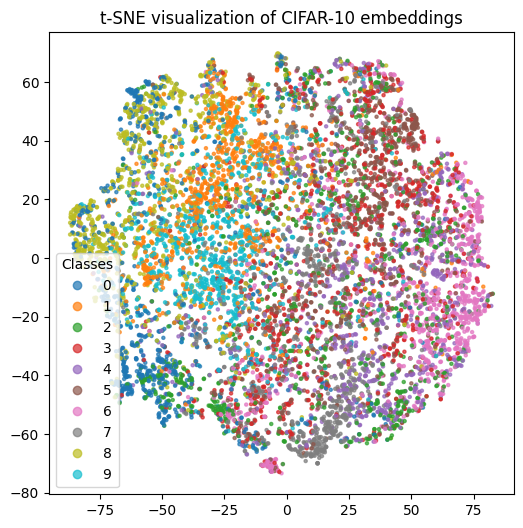

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
reduced_tsne = tsne.fit_transform(embeddings.numpy())

plt.figure(figsize=(6,6))
scatter = plt.scatter(reduced_tsne[:,0], reduced_tsne[:,1], c=labels.numpy(), cmap="tab10", s=5, alpha=0.7)
plt.legend(*scatter.legend_elements(), loc="best", title="Classes")
plt.title("t-SNE visualization of CIFAR-10 embeddings")
plt.show()


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


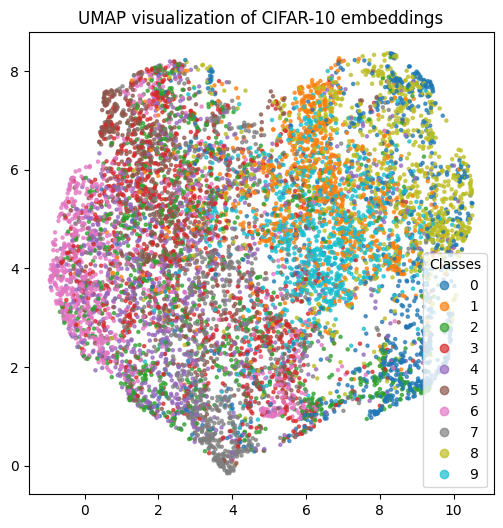

In [ ]:
import umap.umap_ as umap  # use umap-learn's API
import matplotlib.pyplot as plt

# embeddings: [N, feat_dim] tensor from your model
# labels: [N] tensor of class labels

# Convert to NumPy
embeddings_np = embeddings.numpy()
labels_np = labels.numpy()

# --- UMAP ---
reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42
)
reduced_umap = reducer.fit_transform(embeddings_np)

# --- Plot ---
plt.figure(figsize=(6, 6))
scatter = plt.scatter(
    reduced_umap[:, 0],
    reduced_umap[:, 1],
    c=labels_np,
    cmap="tab10",
    s=5,
    alpha=0.7
)
plt.legend(*scatter.legend_elements(), loc="best", title="Classes")
plt.title("UMAP visualization of CIFAR-10 embeddings")
plt.show()



In [ ]:
!ls

data	   outputs    requirements.txt	sample_data	    src
notebooks  README.md  run.sh		simclr-project.zip


In [ ]:
# --- Imports ---
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import sys
import os

# get absolute path to project root
PROJECT_ROOT = os.path.abspath("..")  # adjust if notebooks/ is nested differently
sys.path.append(os.path.join(PROJECT_ROOT, "src"))

print(sys.path)  # optional, to check it was added

from models.resnet import get_resnet
from training.linear_eval import train_linear_classifier, evaluate_and_visualize
from utils.checkpoint import load_checkpoint

# --- Config ---
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 256
LINEAR_EPOCHS = 10
CKPT_PATH = "../outputs/checkpoints/simclr_epoch17.pth"  # your checkpoint

# --- Load CIFAR-10 ---
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
train_set = datasets.CIFAR10(root="../data", train=True, download=True, transform=transform)
test_set = datasets.CIFAR10(root="../data", train=False, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

# --- Load encoder ---
encoder, feat_dim = get_resnet("resnet18", pretrained=False)
encoder = encoder.to(DEVICE)

# Load checkpoint
ckpt = torch.load(CKPT_PATH, map_location=DEVICE)
encoder.load_state_dict(ckpt["encoder_state"], strict=False)
print("Checkpoint loaded successfully!")

# --- Linear evaluation ---
linear_head = train_linear_classifier(encoder, train_loader, num_classes=10, device=DEVICE, epochs=LINEAR_EPOCHS)

# --- Evaluate and visualize embeddings ---
evaluate_and_visualize(encoder, test_loader, device=DEVICE, use_tsne=True, use_umap=True)

['/content', '/env/python', '/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/usr/local/lib/python3.12/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.12/dist-packages/IPython/extensions', '/root/.ipython', '/tmp/tmpszakelzx', '/src', '/content/src', '/content/src', '/content/src', '/content/src', '/content/src', '/content/src', '/content/src', '/content/src', '/src', '/src']


FileNotFoundError: [Errno 2] No such file or directory: '../outputs/checkpoints/simclr_epoch17.pth'

In [ ]:
!ls outputs/checkpoints


simclr_epoch10.pth  simclr_epoch18.pth	       simclr_epoch5.pth
simclr_epoch11.pth  simclr_epoch19.pth	       simclr_epoch6.pth
simclr_epoch12.pth  simclr_epoch1.pth	       simclr_epoch7.pth
simclr_epoch13.pth  simclr_epoch20_linear.pth  simclr_epoch8.pth
simclr_epoch14.pth  simclr_epoch20.pth	       simclr_epoch9.pth
simclr_epoch15.pth  simclr_epoch2.pth	       simclr_latest.pth
simclr_epoch16.pth  simclr_epoch3.pth
simclr_epoch17.pth  simclr_epoch4.pth
